In [236]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [237]:
import pandas as pd
#population in 10k vs profit in 100k
data = pd.read_csv('data/Advertising.csv', delimiter = ';')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [238]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 3].values.reshape(-1,1) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010DF7F28>,
      dtype=object)

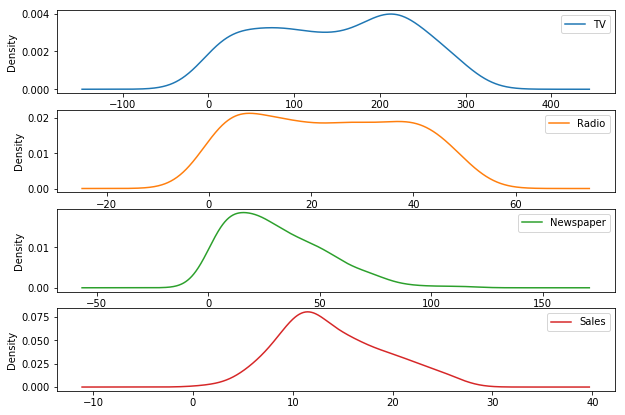

In [239]:
data.plot.density(subplots=True, sharex=False, figsize = (10, 7))

In [240]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X, y)
LR.intercept_, LR.coef_ # w0, w1
coef = LR.coef_
W = np.array([LR.intercept_[0], coef[0][0], coef[0][1], coef[0][2]])
W

array([ 2.93888937e+00,  4.57646455e-02,  1.88530017e-01, -1.03749304e-03])

In [241]:
n = X.shape[0]

In [242]:
X1 = np.hstack((np.ones((n,1)), X))

In [243]:
y_hat = LR.predict(X)

In [245]:
from sklearn.metrics import mean_squared_error as mse
mse_no_scale = mse(y, y_hat)
mse_no_scale

2.784126314510936

# Feature Scaling

In [246]:
from sklearn.preprocessing import StandardScaler #z-score
sc_X = StandardScaler()
sc_Y = StandardScaler()
X2 = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [247]:
LR = LinearRegression()
LR.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [248]:
#W = np.array([LR.intercept_[0], coef[0][0], coef[0][1], coef[0][2]])

In [249]:
y_hat = LR.predict(X2)

In [251]:
mse_standard_scale = mse(y, y_hat)
mse_standard_scale

0.10278936182104788

In [252]:
from sklearn.preprocessing import MinMaxScaler #normalization
sc_X = MinMaxScaler()
sc_Y = MinMaxScaler()
X3 = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [253]:
LR = LinearRegression()
LR.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [254]:
y_hat = LR.predict(X3)

In [256]:
mse_normal_scale = mse(y, y_hat)
mse_normal_scale

0.004315404418300788

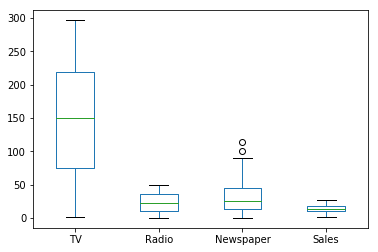

In [257]:
data.plot.box()

In [258]:
X = data.iloc[:, :].values

In [259]:
from sklearn.preprocessing import MinMaxScaler #normalization
sc_X = MinMaxScaler()
sc_Y = MinMaxScaler()
X4 = sc_X.fit_transform(X)

In [260]:
deto = pd.DataFrame(X4)
deto.head()

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


In [261]:
describo = deto.describe()
describo[2][4]

0.10949868073878627

In [262]:
q1_news = describo[2][4]
q3_news = describo[2][6]
IQR_news = q3_news - q1_news

In [263]:
maximo_news = q3_news + 1.5 * IQR_news

In [264]:
deto[deto[2] > maximo_news] 

,0,1,2,3
16,0.226919,0.737903,1.000000,0.429134
101,1.000000,0.731855,0.884785,0.874016


In [265]:
deto = deto.drop([16, 101])

In [266]:
X = deto.iloc[:, :-1].values
y = deto.iloc[:, 3].values.reshape(-1,1) 

In [267]:
LR = LinearRegression()
LR.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [268]:
y_hat = LR.predict(X)

In [269]:
mse_normal_scale_no_outliers = mse(y, y_hat)

In [271]:
Result = pd.DataFrame([mse_no_scale, mse_normal_scale, mse_standard_scale, mse_normal_scale_no_outliers])

In [272]:
Result.index = ['mse_no_scale', 'mse_normal_scale', 'mse_standard_scale', 'mse_normal_scale_no_outliers']

In [274]:
Result.columns = ['Mean Squared Error']

In [275]:
Result

,Mean Squared Error
mse_no_scale,2.784126
mse_normal_scale,0.004315
mse_standard_scale,0.102789
mse_normal_scale_no_outliers,0.004356
